В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
medical_df = pd.read_csv(r'C:\Users\olha.koltun\OneDrive - Trico\ML Course\data\medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [2]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

In [5]:
# --- 1. Least Squares Method (Normal Equation) ---
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Compute coefficients using Normal Equation
least_squares_coefs = normal_equations(X_with_intercept, y)
intercept_ls, slope_ls = least_squares_coefs

# Predictions using Normal Equation
y_pred_ls = np.dot(X_with_intercept, least_squares_coefs)

# RMSE for Normal Equation
rmse_ls = sqrt(mean_squared_error(y, y_pred_ls))

# Print results
print(f'Least Squares Method:')
print(f'  Slope: {slope_ls}')
print(f'  Intercept: {intercept_ls}')
print(f'  RMSE: {rmse_ls}')
print('=' * 50)

Least Squares Method:
  Slope: 267.24891283119973
  Intercept: -2091.4205565650805
  RMSE: 4662.505766636395


In [6]:
# --- 2. Full-batch Gradient Descent ---
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

X_matrix = X.to_numpy().reshape(-1, 1)

# --- Testing Different Learning Rates ---
learning_rates = [0.0005, 0.0001, 0.00001]
results_gd = {}

print(f'Full-batch Gradient Descent:')
for lr in learning_rates:
    slope_gd, intercept_gd, errors_gd = full_batch_gradient_descent(X_matrix, y, lr=lr, epochs=1000)
    y_pred_gd = slope_gd * X_matrix[:, 0] + intercept_gd
    rmse_gd = sqrt(mean_squared_error(y, y_pred_gd))
    
    # Store results
    results_gd[lr] = {
        'slope': slope_gd,
        'intercept': intercept_gd,
        'errors': errors_gd,
        'y_pred': y_pred_gd,
        'rmse': rmse_gd
    }
    
    # Print results
    print(f'  Learning Rate: {lr}')
    print(f'    Slope: {slope_gd}')
    print(f'    Intercept: {intercept_gd}')
    print(f'    RMSE: {rmse_gd}')
    print('=' * 50)

Full-batch Gradient Descent:
  Learning Rate: 0.0005
    Slope: 225.10058069010333
    Intercept: -219.45815699658465
    RMSE: 4704.880181070078
  Learning Rate: 0.0001
    Slope: 221.1045843794301
    Intercept: -41.98126853149978
    RMSE: 4713.250582815521
  Learning Rate: 1e-05
    Slope: 220.15455551129122
    Intercept: 0.2130065279986326
    RMSE: 4715.349750127827


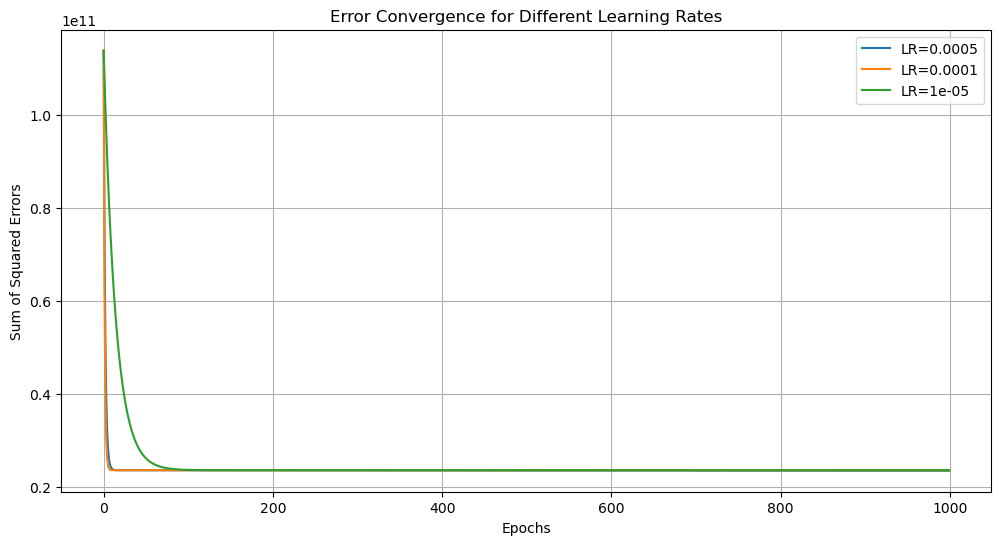

In [7]:
# --- Visualize Error Convergence ---
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    errors_gd = results_gd[lr]['errors']  
    plt.plot(errors_gd, label=f"LR={lr}") 

plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Errors")
plt.title("Error Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

`learning rate`=0.0005 забезпечує найнижчий `RMSE`: 4704.88 серед обраних `learning rates` для градієнтного спуску.
Водночас, на графіку помилок збіжність для `learning rate`=0.0005 та `learning rate`=0.0001 виглядає дуже схожою — обидві лінії майже збігаються, демонструючи схожий характер зменшення помилок.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# --- 3. Scikit-Learn Linear Regression ---
# Convert X to DataFrame
X_frame = X.to_frame(name='age')

# Fit the model
model = LinearRegression()
model.fit(X_frame, y)
slope_lr = model.coef_[0]
intercept_lr = model.intercept_

# Predictions using Linear Regression
y_pred_lr = model.predict(X_frame)

# RMSE for Linear Regression
rmse_lr = sqrt(mean_squared_error(y, y_pred_lr))

# Print results
print(f'Linear Regression:')
print(f'  Slope: {slope_lr}')
print(f'  Intercept: {intercept_lr}')
print(f'  RMSE: {rmse_lr}')
print('=' * 50)

Linear Regression:
  Slope: 267.24891283119956
  Intercept: -2091.4205565650827
  RMSE: 4662.505766636395


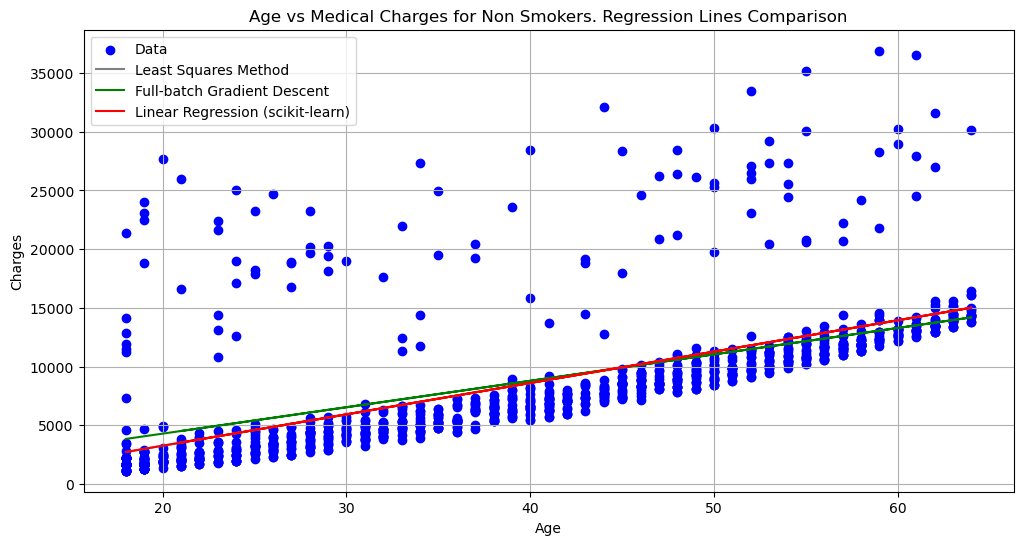

In [10]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data', color='blue')

# Plot regression lines
plt.plot(X, y_pred_ls, label='Least Squares Method', color='grey')
plt.plot(X, results_gd[0.0005]['y_pred'], label='Full-batch Gradient Descent', color='green')
plt.plot(X, y_pred_lr, label='Linear Regression (scikit-learn)', color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Medical Charges for Non Smokers. Regression Lines Comparison')
plt.legend()
plt.grid(True)
plt.show()

`Метод МНК` та `scikit-learn.LinearRegression` дають однакові результати з мінімальним `RMSE` (4662.51) і працюють краще для цього набору даних.

Мої параметри `w3`=290 і `b3`=−3000 є близькими, але трохи завищеними порівняно з точними значеннями `w`=267.25 та `b`=−2091.42. А `RMSE` ручної моделі 4673.51 лише трохи вищий за найкращий результат 4662.51 (різниця ~11), що свідчить про точність моїх припущень.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [11]:
smoker_df = medical_df[medical_df.smoker == 'yes']

smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [12]:
X = smoker_df['age']
y = smoker_df['charges']

In [13]:
X_frame = X.to_frame(name='age')

model = LinearRegression()
model.fit(X_frame, y)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Slope: 305.2376021098288
Intercept: 20294.128126915966


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_frame)

# RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y, y_pred))

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y, y_pred)

# R² (Coefficient of Determination)
r2 = r2_score(y, y_pred)

# Print results
print(f'Metrics for Linear Regression Model:')
print(f'  RMSE: {rmse:.2f}')
print(f'  MAE: {mae:.2f}')
print(f'  R²: {r2:.2f}')

Metrics for Linear Regression Model:
  RMSE: 10711.00
  MAE: 10097.80
  R²: 0.14


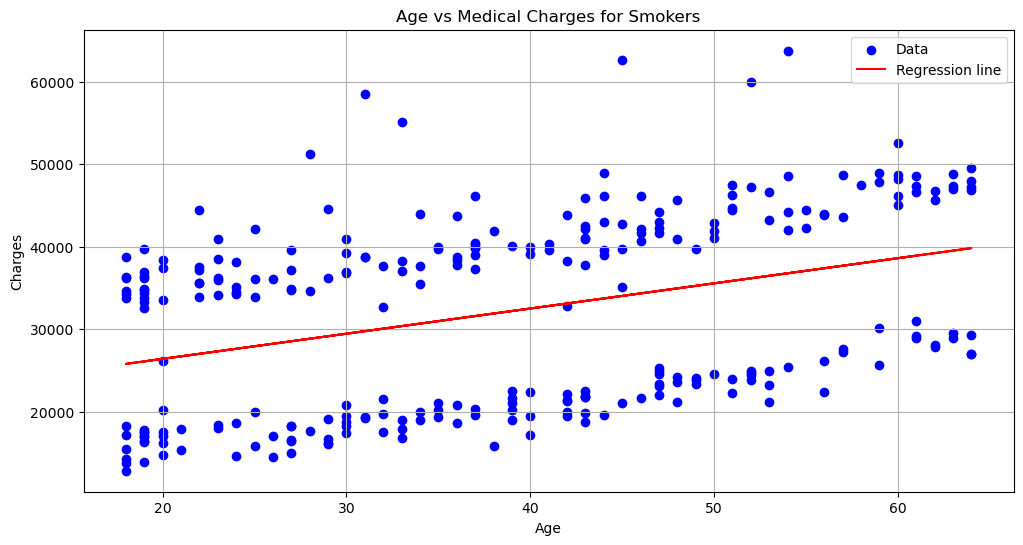

In [15]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, y_pred, label='Regression line', color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Medical Charges for Smokers')
plt.legend()
plt.grid(True)
plt.show()

**Оцінка моделі**:
- **Точність:**
  `RMSE` (10711.00) і `MAE` (10097.80) свідчать про високу похибку, а `R²` (0.14) показує, що вік пояснює лише 14% варіації медичних зборів. Це робить вік слабким фактором для прогнозу.

- **Графік:**
  Лінія регресії лише частково відповідає даним, більшість точок сильно розсіяні.

- **Висновок:**
  Використовувати цю модель не варто, оскільки вона недостатньо точна. Рекомендую додати інші фактори, наприклад BMI.